In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [3]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

In [4]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [5]:
import time

In [8]:
def select_first(driver):
    try:
        first = driver.find_element_by_css_selector('div._9AhH0')  
        # BeautifulSoup 없이 하는 법 익히기, 이 경우 first는 리스트가 아님
        first.click()
        time.sleep(3)
    except:
        print('로그인되어 있지 않아 게시물 클릭이 불가능합니다.')

In [7]:
select_first(driver)

# 게시글 정보 수집

In [9]:
from bs4 import BeautifulSoup

In [10]:
import re

def get_content(driver):
    
    # 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')      #   lxml  ??
    
    # 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text       # 여러 태그 중 첫 번째를 선택
    except:
        content = ''
    
    # 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    tags = re.findall(r'#[^\s,\\]+',content)
    
    # 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]   
    # 실제로 class= '_1o9PC  Nzb55'로 표시돼있는데 공백으로 두 class명을 구분할 수 있다.
    # BeautifulSoup에서 여러 개의 class를 지정할 경우 공백을 점(.)으로 변경해서 지정할 수 있음
    # 태그 내의 datetime 속성값인'2020-03-~~'를 가져오기 위해 ['datetime']후 슬라이싱 했음
    # 1일 전 등은 의미 없는 데이터이므로 생략, 가능하면 정확한 일시 데이터가 좋음, 
    # 어려우면 수집 시점의 일시도 함께 저장해서 나중에 해당 시간을 계산할 수 있게 만드는 것이 좋음
    
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
    
    # 위치 정보 가져오기
    try:
        place = soup.select('div.M30cS')[0].text    
        # 사람마다 동일한 장소를 다르게 적을 수도 있는데 이는 지도 API를 통해 정리할 것임
    except:
        place = ''
        # 인스타그램에서 위치 정보는 필수정보가 아니라 공란인 경우가 많음. 에러를 방지하기 위해 try/except문 활용
    
    # 수집한 정보 저장하기
    data = [content,date,like,place,tags]
    return data

In [11]:
get_content(driver)

['햇살맛집\U0001f90d..#굿베이크샵 #전주카페추천 #전주빵맛집 #전주베이커리카페 #전주브런치',
 '2020-03-11',
 0,
 'Good bake shop',
 ['#굿베이크샵', '#전주카페추천', '#전주빵맛집', '#전주베이커리카페', '#전주브런치']]

# 다음 게시글로 이동

In [12]:
# 다음 게시글은 a 태그에 클래스명을 _65Bje와 coreSpriteRightPaginationArrow라는 두 개를 가지고 있음

def move_next(driver):
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
# 안정적으로 데이터를 수집할 수 있도록 3초간의 대기시간을 줬음. 페이지 로딩이 끝나지 않은 상태에서 다음 게시글 정보 수집이
# 진행될 경우 오류가 발생하거나 데이터 수집이 제대로 이뤄지지 않을 수 있음

In [13]:
move_next(driver)

# 여러 게시글 정보 수집하기

from selenium import webdriver<br>
from bs4 import BeautifulSoup<br>
import time<br>
import re<br>

In [15]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

word = '제주도맛집'
url = insta_searching(word)

driver.get(url)
time.sleep(3)

### 여기서 로그인을 해야 다음을 진행할 수 있음

In [18]:
select_first(driver)

In [19]:
results = []

target=500   
for i in range(target):
    data = get_content(driver)
    results.append(data)
    move_next(driver)
    
print(results[:2])

IndexError: list index out of range

In [21]:
len(results)   # 일단 컴퓨터의 성능문제로 352개까지만 검색

352

In [22]:
results_df = pd.DataFrame(results)

In [23]:
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('./files/first_step.xlsx')

In [48]:
select_first(driver)

In [49]:
like_result=[]

for i in range(352):
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
    like_result.append(like)
    right = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(1)
    
like_result[:5]

['326', '294', '2,596', '208', '176']

In [51]:
results_df['like'] = like_result
results_df.head()

,content,date,like,place,tags
0,햇살맛집🤍..#굿베이크샵 #전주카페추천 #전주빵맛집 #전주베이커리카페 #전주브런치,2020-03-11,326,Good bake shop,"[#굿베이크샵, #전주카페추천, #전주빵맛집, #전주베이커리카페, #전주브런치]"
1,갈비국수는 제주도 3대국수! 숯불직화통갈비의 불맛이 매콤한국물과 만났다!! 안먹을수...,2020-03-10,294,,"[#산도롱맨도롱..#제주맛집, #제주도맛집, #서귀포맛집, #월정리맛집#성산맛집, ..."
2,제주 황우지해안 🏞.봄기운을 가득 느낄 수 있는 서귀포 스팟..썬샤인코스트 카페 주...,2020-03-09,"2,596",황우지해안,"[#제주미니, #jejumini, #제주미니투어, #제주미니무료투어]"
3,미친 비주얼 딱새우회🦐이제야 제주술집인듯 싶다여기에 술은 말할것도 없지😅안주가 맛있...,2020-03-11,208,협재술시,[#협재술시]
4,망고쥬스 맛집 #할로비치 카라바오 추천 받아서 기네스북에 올라간 망고라해서 궁금해서...,2020-03-12,176,할로비치,[#할로비치]


In [52]:
results_df.to_excel('./files/first_step.xlsx')

# 여러 엑셀 파일의 중복을 제거한 후 통합 저장
인스타그램에서 여러 개의 키워드로 검색하거나 여러 번에 걸쳐 데이터를 수집하는 경우 동일한 게시물이 중복으로 수집되는 경우가 발생하기 때문에 중복을 제거하는 과정이 필요

In [63]:
# 이미 제주도맛집, 제주맛집, 제주여행, 제주관광 이라는 검색어로 정보를 수집해 엑셀 파일을 만들어두었다칩시다.

jeju_insta_df = pd.DataFrame([])

folder='./files/'
f_list = ['3_1_crawling_jejudoMatJip.xlsx','3_1_crawling_jejudoGwanGwang.xlsx',
          '3_1_crawling_jejuMatJip.xlsx','3_1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    


In [64]:
jeju_insta_df

,content,date,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]
...,...,...,...,...,...
1703,.간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...,2019-01-01,50,NaN,"['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'..."
1704,고객님들의 소중한사진 감사드립니다^^* . . . . . .제주도 핫플레이스 ● 모...,2019-01-01,4,NaN,"['#통갈치구이', '#성산일출봉맛집', '#성산일출봉', '#섭지코지맛집', '#..."
1705,2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...,2019-01-01,68,Jeju,"['#사진좀찍으시는님덕에건져또', '#이순간']"
1706,2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...,2019-01-01,70,NaN,[]


In [88]:
# 중복데이터를 제거하고 저장

jeju_insta_df.drop_duplicates(subset=['content'],inplace=True)   # 기억기억기억
jeju_insta_df.to_excel('./files/all_results.xlsx',index=False)

In [69]:
len(jeju_insta_df.index)

8369

# 워드클라우드
워드클라우드: 텍스트 내에서 출현하는 단어들의 출현 빈도수에 비례하는 크기로 표출하는 그래프

텍스트 내에서 출현하는 단어들의 출현 빈도수에 비례하는 크기로 표출하는 그래프

In [70]:
jeju_insta_df['tags'][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [96]:
tags_total = []

for tags in jeju_insta_df['tags']:
    tags_list = tags[1:-1].split(",")  #[] 모양이지만 list가 아닌 문자열 --> split통해서 list로 바꿔줌
    for tag in tags_list:
        tags_total.append(tag.strip().strip("''"))       # strip 함수 기능 기억해두기

In [97]:
len(tags_total)

141247

In [98]:
tags_total[:3]

['#제주분식', '#제주맛집', '#제주도맛집']

# 해시태그 출현 빈도 집계
빈도수를 기준으로 상위 해시태그 중 분석과정에 불필요한 해시태그는 제외하고 분석을 진행

In [99]:
from collections import Counter
tag_counts = Counter(tags_total)       #counter 함수는 그룹내 원소의 종류별 빈도수 집계, most_common도 기억

# 리스트이기 때문에 collection 모듈을 사용. Series이면 value_counts()를 사용

In [100]:
tag_counts

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1455,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

In [101]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1455),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [102]:
# 무관한 해시테그 제외하기(데이터 정제)

stopword = ['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹','#서귀포눈썹문신','#제주눈썹문신','#소통','#맞팔']

tag_total_selected=[]
for tag in tags_total:
    if tag not in stopword:
        tag_total_selected.append(tag)

In [117]:
type(tag_total_selected )

list

In [103]:
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(40)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1455),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405)]

In [104]:
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [105]:
# 상위 태그 30개로 자료 구성

tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

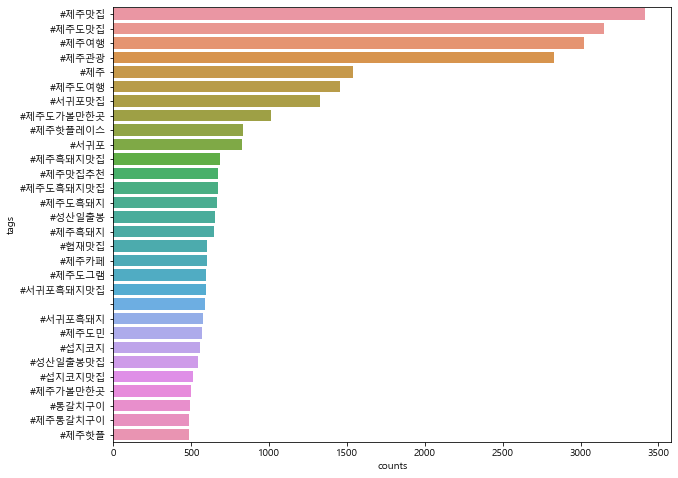

In [106]:
plt.figure(figsize=(10,8))

# 막대차트 익혀가기

sns.barplot(x='counts',y='tags',data=tag_counts_df)

# 해시태그 데이터로 워드클라우드 그리기

In [109]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [111]:
import platform

font_path = 'c:/Windows/Fonts/malgun.ttf'

# wordcloud 사용법 익히기(pip을 통해 설치한 것임)

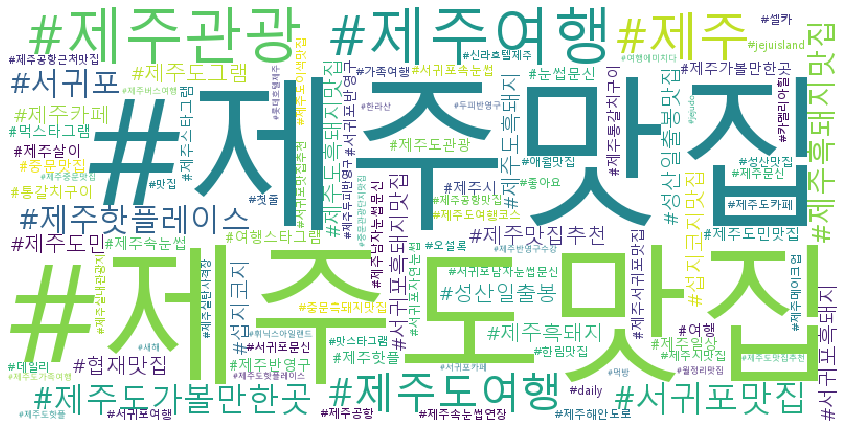

In [113]:
wordcloud = WordCloud(font_path = font_path,
                      background_color='white',
                     max_words=100,
                     relative_scaling=0.3,       #워드 클라우드 내 글자들의 상대적인 크기(0~1)
                     width = 800,
                     height = 400
                     ).generate_from_frequencies(tag_counts_selected)      # 실질적인 데이터를 input
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/result_picture.png')      #savefig

워드클라우드는 실행할 때마다 배치, 색상 등을 무작위로 만들어주기에 표현하기 적합한 그림이 나올 때까지 다양하게 만들어 사용하는 것이 좋음

# 지도 시각화
네이버 API를 활용해 위도/경도 좌표로 변환하고 folium 라이브러리를 활용해 지도에 표시

In [115]:
jeju_insta_df

,content,date,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]
...,...,...,...,...,...
1702,Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...,2019-01-01,42,NaN,"['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그..."
1703,.간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...,2019-01-01,50,NaN,"['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'..."
1705,2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...,2019-01-01,68,Jeju,"['#사진좀찍으시는님덕에건져또', '#이순간']"
1706,2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...,2019-01-01,70,NaN,[]


In [118]:
location_counts = jeju_insta_df['place'].value_counts()
location_counts

Jeju                    241
Jeju-do                 172
Jungle Book by Alice    101
Seogwipo                 65
제주도 크리스마스 박물관            59
                       ... 
제주도 하도리                   1
유리네 식당                    1
스시애월                      1
올레길 5코스                   1
지금여기                      1
Name: place, Length: 1027, dtype: int64

In [119]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59
...,...
제주도 하도리,1
유리네 식당,1
스시애월,1
올레길 5코스,1


In [143]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '석부작박물관',
 '제주도 애월읍',
 '카멜리아 힐',
 '알뜨르 비행장',
 '고집돌우럭중문점',
 '밥깡패',
 '제주레포츠랜드',
 '제주 함덕 서우봉 해변',
 '위미동백나무군락지',
 '할로비치',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주신화월드 Jeju Shinhwa World',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '협재해변 Beach',
 '연동 바오젠 거리',
 'Woljeongri Beach',
 '새별오름',
 '고래배꼽',
 '용눈이오름',
 '용머리해안',
 '제주빅볼랜드',
 '사려니숲길',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '하이엔드 제주',
 '캔디원',
 '위미2리 동백군락지',
 'Jeju Aewol',
 '휴애리 자연생활공원',
 '위미동백나무군락',
 '서귀포 느영나영 게스트하우스',
 '제주커피박물관 Baum',
 '삼무공원',
 '마마뜰',
 'Jeju Island 제주특별자치도 济州道',
 '한라산',
 '광치기해변',
 '한라산 (漢拏山, Hallasan)',
 '제주해남',
 '서우봉',
 '성이시돌목장',
 '월정리카페콧수염',
 '옹포별장가든',
 '제주 송악산',
 '제주어린왕자게스트하우스',
 '에코랜드',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '牛岛 Udo Island 우도',
 '카페브리프',
 '곽지해수욕장',
 '카페한라산',
 '산굼부리',
 '아줄레주',
 '노라바',
 '하도핑크',
 '소세지가게',
 '고집돌우럭-gozipfish',
 '로타

[카카오 API를 사용하기 위한 사이트](https://www.notion.so/API-Play-with-Data-6156b17b222b4d0ca495a4cc3f2e41c6)

In [122]:
import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK b87ec76e37e5df364cd2b08b2c35e49a"
}


# url 주소에 정보를 요청(headers에 저장된 아이디와 패스워드 함께 전달). 
# searching과 유사한 순으로 데이터 가져옴, 위치 + 검색어로 입력하면 해당 위치에 맞게 검색 가능
# 요청 받은 결과를 json 형태로 불러옴
# documents 항목의 값을 선택
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '02-758-8856',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '02-323-3214',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.9121929350555',
  'y': '37.5499934909868'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '02-324-3587',
  'pla

In [136]:
def find_places(searching):
    
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "입력하시오"
        }
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    name = place['place_name']
    x = place['x']
    y = place['y']
    data = [name,x,y,searching]
    
    return data

In [139]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

### 인스타그램 위치명에 따른 위치 정보 검색

In [145]:
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '석부작박물관',
 '제주도 애월읍',
 '카멜리아 힐',
 '알뜨르 비행장',
 '고집돌우럭중문점',
 '밥깡패',
 '제주레포츠랜드',
 '제주 함덕 서우봉 해변',
 '위미동백나무군락지',
 '할로비치',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주신화월드 Jeju Shinhwa World',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '협재해변 Beach',
 '연동 바오젠 거리',
 'Woljeongri Beach',
 '새별오름',
 '고래배꼽',
 '용눈이오름',
 '용머리해안',
 '제주빅볼랜드',
 '사려니숲길',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '하이엔드 제주',
 '캔디원',
 '위미2리 동백군락지',
 'Jeju Aewol',
 '휴애리 자연생활공원',
 '위미동백나무군락',
 '서귀포 느영나영 게스트하우스',
 '제주커피박물관 Baum',
 '삼무공원',
 '마마뜰',
 'Jeju Island 제주특별자치도 济州道',
 '한라산',
 '광치기해변',
 '한라산 (漢拏山, Hallasan)',
 '제주해남',
 '서우봉',
 '성이시돌목장',
 '월정리카페콧수염',
 '옹포별장가든',
 '제주 송악산',
 '제주어린왕자게스트하우스',
 '에코랜드',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '牛岛 Udo Island 우도',
 '카페브리프',
 '곽지해수욕장',
 '카페한라산',
 '산굼부리',
 '아줄레주',
 '노라바',
 '하도핑크',
 '소세지가게',
 '고집돌우럭-gozipfish',
 '로타

In [147]:
location_inform = []
for location in locations:
    try:
        data = find_places(location)
        location_inform.append(data)
        time.sleep(0.5)  # 과도하게 빠른 요청 때문에 API 서버에서 접근을 차단해 오류가 발생할 가능성을 낮추기 위함
    except:
        pass
    
location_inform

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관',
  '126.32786432205793',
  '33.291569413292265',
  '제주도 크리스마스 박물관'],
 ['제주에인감귤밭', '126.539409663514', '33.2566099433115', '제주에인감귤밭'],
 ['제주도', '126.545875710283', '33.3797769227161', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['밥깡패', '126.263436208895', '33.410093302084', '밥깡패'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 함덕 서우봉

In [148]:
loc_inf_df = pd.DataFrame(location_inform,columns=['공식위치명','경도','위도','인스타위치명'])
loc_inf_df.to_excel('./files/loc_inf.xlsx',index=False)

## 위치 정보별 인스타 게시량 정리

In [151]:
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [150]:
loc_inf_df.head()

,공식위치명,경도,위도,인스타위치명
0,Jeju in aA,126.83650369902168,33.53833652360498,Jeju
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo
2,바이나흐튼 크리스마스박물관,126.32786432205793,33.291569413292265,제주도 크리스마스 박물관
3,제주에인감귤밭,126.539409663514,33.2566099433115,제주에인감귤밭
4,제주도,126.545875710283,33.3797769227161,Jeju Island


In [155]:
location_data = pd.merge(loc_inf_df,location_counts_df, how='inner',left_on = '인스타위치명',right_index=True) 
# right_index를 주목, left_on은 병합의 기준이 되는 컬럼
location_data.head()

,공식위치명,경도,위도,인스타위치명,place
0,Jeju in aA,126.83650369902168,33.53833652360498,Jeju,241
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo,65
2,바이나흐튼 크리스마스박물관,126.32786432205793,33.291569413292265,제주도 크리스마스 박물관,59
3,제주에인감귤밭,126.539409663514,33.2566099433115,제주에인감귤밭,48
4,제주도,126.545875710283,33.3797769227161,Jeju Island,39


In [157]:
location_data.to_excel('./files/final.xlsx',index=False)

In [158]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 840
Data columns (total 5 columns):
공식위치명     841 non-null object
경도        841 non-null object
위도        841 non-null object
인스타위치명    841 non-null object
place     841 non-null int64
dtypes: int64(1), object(4)
memory usage: 39.4+ KB


# folium을 이용해 지도 시각화

In [160]:
!pip install folium

In [161]:
import folium

In [166]:
Mt_Hanla = [33.36250, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start = 11)
map_jeju

In [170]:
Mt_Hanla = [33.36250, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start = 11)  # Map을 보여줌, 위도 경도 순으로 입력
map_jeju

for i in range(len(location_data)):
    name = location_data['공식위치명'][i]  #공식명칭
    count = location_data['place'][i]      #게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat),radius = size, color='red',popup = name).add_to(map_jeju)
    
map_jeju

In [172]:
map_jeju.save('nice_picture.html')     #  png가 지원되지 않음

### 그룹으로 표시
서클 마커가 특정 지역에 너무 몰려있을 경우 개별 위치를 파악하기 어렵다는 단점이 있음--> 보완하기 위해 서클마커들끼리 그룹으로 묶어 표현

In [173]:
from folium.plugins import MarkerCluster

locations=[]
names=[]

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']),float(data['경도'])))
    names.append(data['공식위치명'])
    
icon_create_function = """\
function(cluster){
return L.divIcon({
html: '<b>'+cluster.getChildCount()+'</b>',
className: 'marker-cluster-large',
iconSize: new L.Point(30,30)
});
}"""

Mt_Hanla = [33.36250, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
locations=locations , popus=names, name='Jeju',overlay = True, control = True, icon_create_function = icon_create_function)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2